<a href="https://colab.research.google.com/github/Maxxx-VS/Machine_Learning/blob/main/Igor_testovoe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RestorauntGroup - адрес магазина
UniqOrderId - Количество уникальных чеков, шт
DishDiscountSumInt.average - Сумма среднего чека, р
OpenDate.Typed - Дата
DishDiscountSumInt - Сумма продаж, р
DishAmountInt - Количество проданной продукции, шт
OrderItems - технологический столбец (количество строк фиксации продаж)

Задание- спрогнозировать сумму прода и количество штук продукции на год вперед.

In [1]:
# РЕШЕНИЕ №1 ЧЕРЕЗ АРИФМЕТИЧЕСКОЕ ВЫЧИСЛЕНИЕ СРЕДНЕГО ЗНАЧЕНИЯ В ДЕНЬ И ЭКСТРАПОЛЯЦИИ НА ГОД

In [2]:
# импортирую необходимые библиотеки
import pandas as pd
import numpy as np
import torch

# загружаю ДФ
df = pd.read_csv('/content/danniepol2.csv', engine='python', encoding='utf-8')

# вывожу форму ДФ
print(df.shape)

(252080, 7)


In [3]:
# удаляю технический стобец
del df['OrderItems']

# вывожу список всех столбцов
print(df.columns)

Index(['RestorauntGroup', 'UniqOrderId', 'DishDiscountSumInt.average',
       'OpenDate.Typed', 'DishDiscountSumInt', 'DishAmountInt'],
      dtype='object')


In [4]:
# даю нормальные имена столбцам
df = df.rename(columns={'RestorauntGroup': 'ADRESS',
                        'UniqOrderId': 'COUNT_CHEK',
                        'DishDiscountSumInt.average': 'SUM_AVERAGE_CHEK',
                        'OpenDate.Typed': 'DATE',
                        'DishDiscountSumInt': 'SUMMA_PROD',
                        'DishAmountInt': 'COUNT_PROD'})

In [5]:
print(df.head(1))

                           ADRESS  COUNT_CHEK  SUM_AVERAGE_CHEK        DATE  \
0  Ставрополь, ул. Доваторцев 75а        71.0            619.56  2024-02-25   

   SUMMA_PROD  COUNT_PROD  
0     43989.0       603.0  


In [6]:
# вывожу информацию о ДФ
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252080 entries, 0 to 252079
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ADRESS            251641 non-null  object 
 1   COUNT_CHEK        252079 non-null  float64
 2   SUM_AVERAGE_CHEK  252078 non-null  float64
 3   DATE              252077 non-null  object 
 4   SUMMA_PROD        252077 non-null  float64
 5   COUNT_PROD        252077 non-null  float64
dtypes: float64(4), object(2)
memory usage: 11.5+ MB
None


In [7]:
# заполняю пропуски медианными значениями
median_value = df['COUNT_CHEK'].median()
df['COUNT_CHEK'].fillna(median_value, inplace=True)

median_value = df['SUM_AVERAGE_CHEK'].median()
df['SUM_AVERAGE_CHEK'].fillna(median_value, inplace=True)

median_value = df['SUMMA_PROD'].median()
df['SUMMA_PROD'].fillna(median_value, inplace=True)

median_value = df['COUNT_PROD'].median()
df['COUNT_PROD'].fillna(median_value, inplace=True)

<ipython-input-7-81d973cc78e3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['COUNT_CHEK'].fillna(median_value, inplace=True)
<ipython-input-7-81d973cc78e3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [8]:
# вывожу информацию о ДФ
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252080 entries, 0 to 252079
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ADRESS            251641 non-null  object 
 1   COUNT_CHEK        252080 non-null  float64
 2   SUM_AVERAGE_CHEK  252080 non-null  float64
 3   DATE              252077 non-null  object 
 4   SUMMA_PROD        252080 non-null  float64
 5   COUNT_PROD        252080 non-null  float64
dtypes: float64(4), object(2)
memory usage: 11.5+ MB
None


In [9]:
# удалаю строки со значением NaN
df = df.dropna(subset=['DATE'])
df = df.dropna(subset=['ADRESS'])

In [10]:
# еще раз вывожу информацию о ДФ
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 251639 entries, 0 to 252079
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ADRESS            251639 non-null  object 
 1   COUNT_CHEK        251639 non-null  float64
 2   SUM_AVERAGE_CHEK  251639 non-null  float64
 3   DATE              251639 non-null  object 
 4   SUMMA_PROD        251639 non-null  float64
 5   COUNT_PROD        251639 non-null  float64
dtypes: float64(4), object(2)
memory usage: 13.4+ MB
None


In [11]:
# считаю сколько уникальных дней (дат) собрано в ДФ
count_unicue_date = df["DATE"].unique()
print(len(count_unicue_date))

# повторно проверяю кол-во дней
df.nunique()

656


,0
ADRESS,697
COUNT_CHEK,540
SUM_AVERAGE_CHEK,73425
DATE,656
SUMMA_PROD,105421
COUNT_PROD,8055


In [38]:
# считаю сумму по полю, делю на количество уникальных дат и умножаю на 365
summ_prod_df = df['SUMMA_PROD'].sum()
count_prod_df = df['COUNT_PROD'].sum()

print(f'Прогноз годовой суммы прода = {round(summ_prod_df / 656 * 365, 2)} руб.')
print(f'Прогноз годового кол-ва штук = {round(count_prod_df / 656 * 365, 2)} шт.')

Прогноз годовой суммы прода = 7683478199.54 руб.
Прогноз годового кол-ва штук = 144165344.96 шт.


In [13]:
# РЕШЕНИЕ №2 ЧЕРЕЗ ПОЛНОСВЯЗНУЮ НС

In [14]:
# импортирую необходимые библиотеки
from keras import models
from keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf

In [15]:
# загружаю ДФ
data = pd.read_csv('/content/danniepol2.csv', engine='python', encoding='utf-8')

In [16]:
# даю нормальные имена столбцам
data = data.rename(columns={'RestorauntGroup': 'ADRESS',
                        'UniqOrderId': 'COUNT_CHEK',
                        'DishDiscountSumInt.average': 'SUM_AVERAGE_CHEK',
                        'OpenDate.Typed': 'DATE',
                        'DishDiscountSumInt': 'SUMMA_PROD',
                        'DishAmountInt': 'COUNT_PROD',
                        'OrderItems': 'TEHNOL'})

In [17]:
# вывожу информацию о ДФ
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252080 entries, 0 to 252079
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ADRESS            251641 non-null  object 
 1   COUNT_CHEK        252079 non-null  float64
 2   SUM_AVERAGE_CHEK  252078 non-null  float64
 3   DATE              252077 non-null  object 
 4   SUMMA_PROD        252077 non-null  float64
 5   COUNT_PROD        252077 non-null  float64
 6   TEHNOL            252077 non-null  float64
dtypes: float64(5), object(2)
memory usage: 13.5+ MB
None


In [18]:
# заполняю пропуски медианными значениями
median_value = data['COUNT_CHEK'].median()
data['COUNT_CHEK'].fillna(median_value, inplace=True)

median_value = data['SUM_AVERAGE_CHEK'].median()
data['SUM_AVERAGE_CHEK'].fillna(median_value, inplace=True)

median_value = data['SUMMA_PROD'].median()
data['SUMMA_PROD'].fillna(median_value, inplace=True)

median_value = data['COUNT_PROD'].median()
data['COUNT_PROD'].fillna(median_value, inplace=True)

median_value = data['TEHNOL'].median()
data['TEHNOL'].fillna(median_value, inplace=True)

<ipython-input-18-6658cb3559a4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['COUNT_CHEK'].fillna(median_value, inplace=True)
<ipython-input-18-6658cb3559a4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [19]:
# вывожу информацию о ДФ
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252080 entries, 0 to 252079
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ADRESS            251641 non-null  object 
 1   COUNT_CHEK        252080 non-null  float64
 2   SUM_AVERAGE_CHEK  252080 non-null  float64
 3   DATE              252077 non-null  object 
 4   SUMMA_PROD        252080 non-null  float64
 5   COUNT_PROD        252080 non-null  float64
 6   TEHNOL            252080 non-null  float64
dtypes: float64(5), object(2)
memory usage: 13.5+ MB
None


In [20]:
# удалаю строки со значением NaN
data = data.dropna(subset=['DATE'])
data = data.dropna(subset=['ADRESS'])

In [21]:
# вывожу информацию о ДФ
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 251639 entries, 0 to 252079
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ADRESS            251639 non-null  object 
 1   COUNT_CHEK        251639 non-null  float64
 2   SUM_AVERAGE_CHEK  251639 non-null  float64
 3   DATE              251639 non-null  object 
 4   SUMMA_PROD        251639 non-null  float64
 5   COUNT_PROD        251639 non-null  float64
 6   TEHNOL            251639 non-null  float64
dtypes: float64(5), object(2)
memory usage: 15.4+ MB
None


In [22]:
print(data.head(1))

                           ADRESS  COUNT_CHEK  SUM_AVERAGE_CHEK        DATE  \
0  Ставрополь, ул. Доваторцев 75а        71.0            619.56  2024-02-25   

   SUMMA_PROD  COUNT_PROD  TEHNOL  
0     43989.0       603.0   319.0  


In [23]:
x_data = data[['COUNT_CHEK', 'SUM_AVERAGE_CHEK', 'COUNT_PROD', 'TEHNOL']]
y_data = data[['SUMMA_PROD']]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

In [24]:
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(4,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


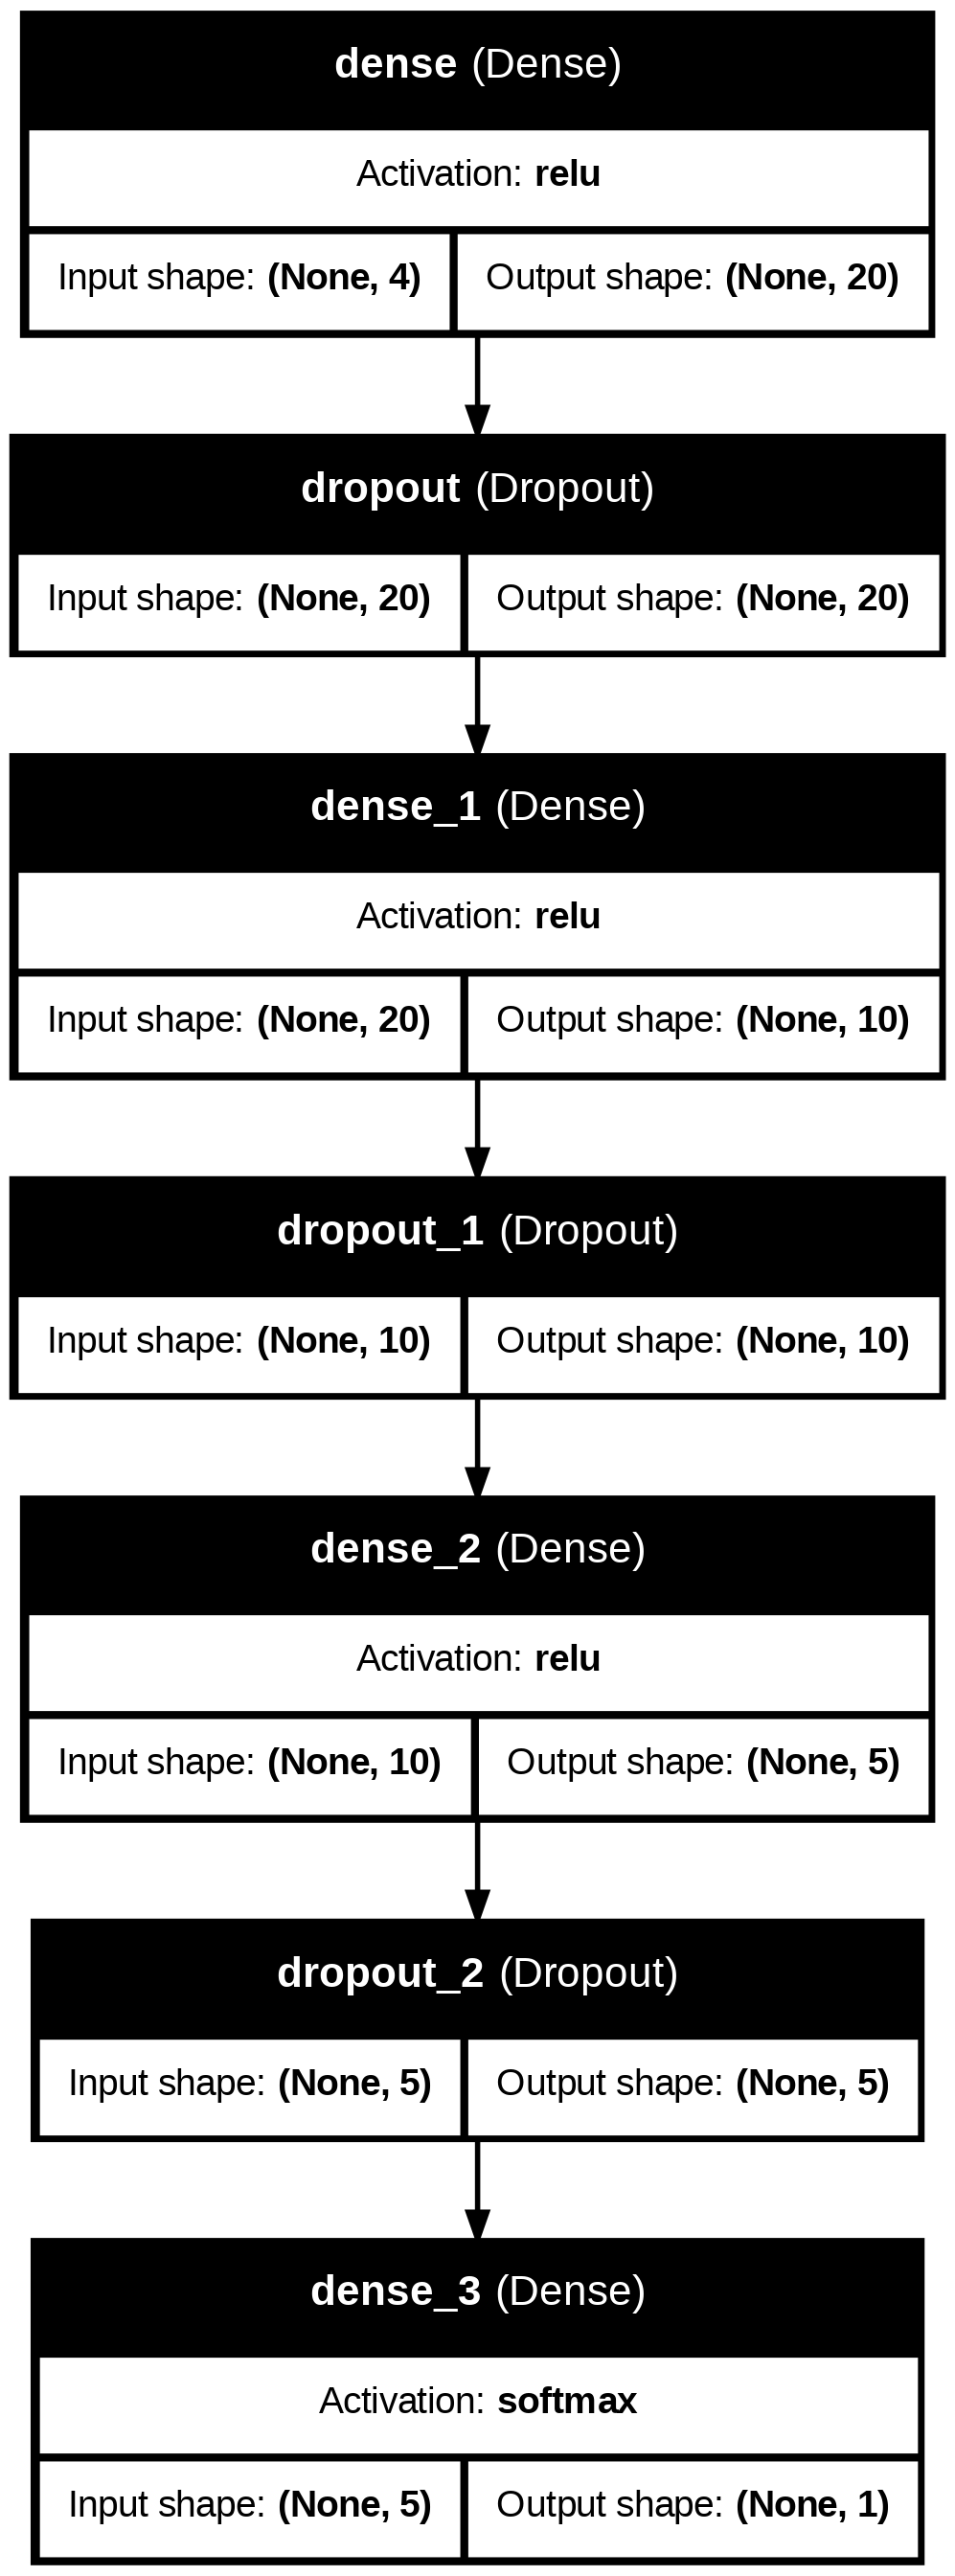

In [25]:
from keras import utils
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [26]:
EPOCHS = 10
BATCH_SIZE = 256

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.05)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


834/841 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4469692928.0000 - mae: 54911.9844

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4469570560.0000 - mae: 54911.3516 - val_loss: 4527040000.0000 - val_mae: 55300.1523
Epoch 2/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4482033152.0000 - mae: 54883.3008 - val_loss: 4527040000.0000 - val_mae: 55300.1523
Epoch 3/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4446285824.0000 - mae: 54788.6914 - val_loss: 4527040000.0000 - val_mae: 55300.1523
Epoch 4/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4457323008.0000 - mae: 54857.6367 - val_loss: 4527040000.0000 - val_mae: 55300.1523
Epoch 5/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4442937856.0000 - mae: 54757.1992 - val_loss: 4527040000.0000 - val_mae: 55300.1523
Epoch 6/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4523879424.0000 - mae: 55024.1094 - val_loss: 4527040000.0000 - val_mae: 55300.1523
Epoch 7/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4510155264.0000 - mae: 54960.8242 - val_loss: 4527040000.0000 - val_mae: 55300.1523
Epo

In [29]:
Y_pred = model.predict(X_test)
print(Y_pred[0])

787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[0.99999994]


In [30]:
test_accuracy = model.evaluate(X_test, y_test)
print(round(test_accuracy[1], 2))

787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4484328448.0000 - mae: 54682.2578
54988.64


In [33]:
x_data = data[['COUNT_CHEK', 'SUM_AVERAGE_CHEK', 'SUMMA_PROD', 'TEHNOL']]
y_data = data[['COUNT_PROD']]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

In [34]:
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(4,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
EPOCHS = 10
BATCH_SIZE = 256

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.05)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


829/841 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2319423.5000 - mae: 1031.8276

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2323960.7500 - mae: 1031.7910 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 2/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1902592.1250 - mae: 1027.8458 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 3/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2204720.2500 - mae: 1030.1245 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 4/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3423891.2500 - mae: 1032.1323 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 5/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2115382.7500 - mae: 1027.3604 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 6/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3594141.7500 - mae: 1029.5109 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 7/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4523562.5000 - mae: 1034.0078 - val_loss: 1692207.0000 - val_mae: 1024.4712
Epoch 8/10
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss:

In [36]:
Y_pred = model.predict(X_test)
print(Y_pred[0])

 94/787 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


[0.99999994]


In [37]:
test_accuracy = model.evaluate(X_test, y_test)
print(round(test_accuracy[1], 2))

787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1660675.2500 - mae: 1018.0146
1023.81


In [40]:
print(f'Прогноз годовой суммы прода = {round(54988.64 * 365, 2)} руб.')
print(f'Прогноз годового кол-ва штук = {round(1023.81 * 365, 2)} шт.')

Прогноз годовой суммы прода = 20070853.6 руб.
Прогноз годового кол-ва штук = 373690.65 шт.
